In [10]:
# Подключаем библиотеки

import json
from PIL import Image, ImageDraw

In [4]:
# Загружаем архив и аннотации

from google.colab import files

files.upload()

Saving images.zip to images (1).zip


In [3]:
files.upload()

Saving 3330-3360.json to 3330-3360.json
Saving test.json to test.json


{'3330-3360.json': b'{"03330.PNG64307":{"filename":"03330.PNG","size":64307,"regions":[{"shape_attributes":{"name":"polygon","all_points_x":[163,167,163,169,187,196,194,196,196,182,164],"all_points_y":[18,28,47,41,43,46,34,29,17,19,17]},"region_attributes":{"2":"spinal_canal"}},{"shape_attributes":{"name":"polygon","all_points_x":[173,182,196,186,171,163,165],"all_points_y":[51,51,47,43,41,47,49]},"region_attributes":{"1":"intervertebral_disc"}},{"shape_attributes":{"name":"polygon","all_points_x":[155,163,181,191,193,193,190,197,197,182,172,163,163,157,155],"all_points_y":[78,75,76,83,83,74,68,49,47,52,51,49,59,72,74]},"region_attributes":{"2":"spinal_canal"}},{"shape_attributes":{"name":"polygon","all_points_x":[172,181,190,181,164,156,156,156],"all_points_y":[86,87,84,76,76,79,80,81]},"region_attributes":{"1":"intervertebral_disc"}},{"shape_attributes":{"name":"polygon","all_points_x":[147,162,173,188,186,193,181,155,155,153],"all_points_y":[118,114,114,120,103,84,87,80,92,102]},"re

In [5]:
# Разорхивируем архив с изображениями
!unzip "images (1).zip"

Archive:  images (1).zip
   creating: images/
  inflating: images/00100.PNG        
  inflating: images/00101.PNG        
  inflating: images/00102.PNG        
  inflating: images/00103.PNG        
  inflating: images/00104.PNG        
  inflating: images/00105.PNG        
  inflating: images/00106.PNG        
  inflating: images/00107.PNG        
  inflating: images/00108.PNG        
  inflating: images/00109.PNG        
  inflating: images/00110.PNG        
  inflating: images/00111.PNG        
  inflating: images/00112.PNG        
  inflating: images/00113.PNG        
  inflating: images/00114.PNG        
  inflating: images/00115.PNG        
  inflating: images/00116.PNG        
  inflating: images/00117.PNG        
  inflating: images/00118.PNG        
  inflating: images/00119.PNG        
  inflating: images/00120.PNG        
  inflating: images/00121.PNG        
  inflating: images/00122.PNG        
  inflating: images/00123.PNG        
  inflating: images/00124.PNG        
  in

# Тестируем создание маски

In [11]:
# Загрузим информацию из JSON-файла с аннотациями

json_file = 'test.json'
with open(json_file, 'r') as f:
    annotations = json.load(f)

for file_name, file_data in annotations.items():
    print("Файл:", file_name)

    # Итерация по каждому региону
    for region in file_data['regions']:
        print("Регион:")
        print("Форма:", region['shape_attributes']['name'])
        print("Все точки x:", region['shape_attributes']['all_points_x'])
        print("Все точки y:", region['shape_attributes']['all_points_y'])
        print("Атрибуты региона:", region['region_attributes'])

    print()

Файл: 00100.PNG71632
Регион:
Форма: polygon
Все точки x: [176, 172, 174, 189, 194, 200, 197]
Все точки y: [9, 12, 15, 17, 18, 16, 12]
Атрибуты региона: {'1': 'intervertebral_disc'}
Регион:
Форма: polygon
Все точки x: [169, 170, 179, 184, 189, 197, 191, 172]
Все точки y: [47, 50, 51, 52, 52, 51, 48, 44]
Атрибуты региона: {'1': 'intervertebral_disc'}
Регион:
Форма: polygon
Все точки x: [158, 155, 160, 175, 192, 194, 196, 188, 185, 181, 175, 166, 160]
Все точки y: [77, 90, 90, 92, 92, 92, 86, 83, 83, 82, 81, 79, 79]
Атрибуты региона: {'1': 'intervertebral_disc'}
Регион:
Форма: polygon
Все точки x: [173, 172, 176, 194, 197, 201, 202, 203, 205]
Все точки y: [0, 8, 9, 11, 11, 12, 12, 11, 1]
Атрибуты региона: {'2': 'spinal_canal'}
Регион:
Форма: polygon
Все точки x: [169, 171, 171, 166, 168, 172, 181, 193, 196, 198, 201]
Все точки y: [18, 24, 31, 41, 43, 42, 44, 46, 47, 47, 20]
Атрибуты региона: {'2': 'spinal_canal'}
Регион:
Форма: polygon
Все точки x: [163, 163, 164, 164, 159, 161, 166, 185,

In [12]:
height = 312
width = 316

In [13]:
def create_mask(annotations):
    # Проходимся по каждой аннотации
    masks = []
    for file_name, file_data in annotations.items():
        mask = Image.new("RGB", (width, height), (0, 0, 0))
        regions = file_data['regions']

        for region in regions:
          shape_attributes = region['shape_attributes']
          region_attributes = region['region_attributes']

          # Получаем координаты полигона
          polygon = list(zip(shape_attributes['all_points_x'], shape_attributes['all_points_y']))

          # Получаем класс региона
          region_class = list(region_attributes.keys())[0]

          # Задаем цвет для класса региона
          if region_class == '1':
              color = (160, 160, 164)  # intervertebral_disc (красный канал)
          elif region_class == '2':
              color = (90, 90, 90)  # spinal_canal (зеленый канал)
          else:
              color = (0, 0, 0)  # Фон
          # Создаем маску на основе полигона и цвета класса
          ImageDraw.Draw(mask).polygon(polygon, outline=color, fill=color)

        masks.append(mask)
    return masks

In [14]:
masks = create_mask(annotations)
masks

[<PIL.Image.Image image mode=RGB size=316x312 at 0x7F3159262C50>,
 <PIL.Image.Image image mode=RGB size=316x312 at 0x7F3159262FE0>,
 <PIL.Image.Image image mode=RGB size=316x312 at 0x7F31592618D0>]

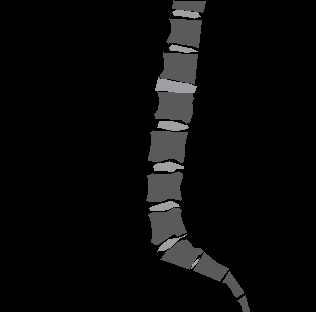

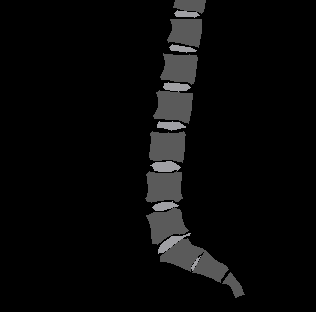

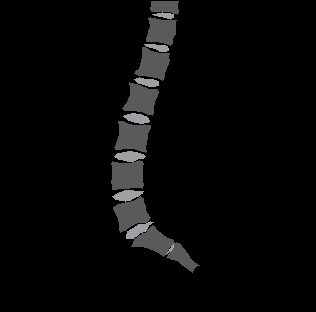

In [15]:
for mask in masks:
  mask.show()

# Формируем датасет масок

In [16]:
import os
import zipfile
from pathlib import Path

def create_mask(images_path, annotations):
    index = 0
    masks = []
    images = os.listdir(images_path)
    im_size, im_width = 0, 0

    for file_name, file_data in annotations.items():
        for img in images:
          if file_name[:5] == img[:5]:
            image = Image.open(data_folder + '/' + img)
            im_size, im_width = image.size
        mask = Image.new("RGB", (im_size, im_width), (0, 0, 0))
        regions = file_data['regions']

        for region in regions:
          shape_attributes = region['shape_attributes']
          region_attributes = region['region_attributes']

          # Получаем координаты полигона
          polygon = list(zip(shape_attributes['all_points_x'], shape_attributes['all_points_y']))

          # Получаем класс региона
          region_class = list(region_attributes.keys())[0]

          # Задаем цвет для класса региона
          if region_class == '1':
              color = (160, 160, 164)  # intervertebral_disc
          elif region_class == '2':
              color = (90, 90, 90)  # spinal_canal
          else:
              color = (0, 0, 0)  # Фон

          # Создаем маску на основе полигона и цвета класса
          ImageDraw.Draw(mask).polygon(polygon, outline=color, fill=color)

        masks.append(mask)
        index += 1
    return masks

In [17]:
# Так как файлов аннотаций было немного, я вручную переименовывал json_file и num, так из 6 скачанных архивов был создан итоговый датасет
# Здесь для примера я создаю json_file c аннотациями с 3330 по 3360

json_file = '3330-3360.json'
with open(json_file, 'r') as f:
    annotations = json.load(f)

# Папка с изображениями и аннотациями
data_folder = "images"
images = os.listdir(data_folder)

# Создаем папку для сохранения масок
masks_folder = "masks3330-3360"
Path(masks_folder).mkdir(parents=True, exist_ok=True) # создаем директорию для масок
masks = create_mask(data_folder, annotations) # создаем маски

In [18]:
# Проверям маски
masks

[<PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148962A10>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148962560>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148962470>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148962440>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148962B00>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F31489624A0>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F31489623E0>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148962410>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F31489622F0>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148962290>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148962230>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148961870>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148961930>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F3148960460>,
 <PIL.Image.Image image mode=RGB size=320x316 at 0x7F31489615A0>,
 <PIL.Imag

In [19]:
num = 3330

# Проходимся, сохраняем и переименовываем
for idx, mask in enumerate(masks):
    filename = '0' + str(num) + '.PNG'
    mask_filename = filename.replace(".PNG", "_mask.PNG")
    mask_path = os.path.join(masks_folder, mask_filename)
    mask.save(mask_path)
    num += 1

# Создаем архив
zip_filename = "masks3330-3360.zip"
with zipfile.ZipFile(zip_filename, "w") as zipf:
    # Добавляем маски в архив
    for filename in os.listdir(masks_folder):
        mask_path = os.path.join(masks_folder, filename)
        zipf.write(mask_path, arcname=os.path.join("masks", filename))

print("Архив создан: " + zip_filename)

Архив создан: masks3330-3360.zip
